In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('magma')
import numpy as np

plt.style.use('aa_paper')
%matplotlib inline

This notebook describes our process of designing optimal guides for allele-specific excision for the gene *BEST1*.

# Identify variants to target - *BEST1*

Identify exhaustive list of targetable variant pairs in the gene with 1000 Genomes data for different excision maximum limits. 5kb was used for the paper.

**5kb:**

`python ~/projects/AlleleAnalyzer/scripts/ExcisionFinder.py -v /pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/1000genomes_analysis/get_gene_list/gene_list_hg38.tsv BEST1 /pollard/public-www/public-share-www/excisionFinderData_public/1kgp_dat/hg38/variants_annotations/hg38_targs/11_targ.hdf5 5000 SpCas9,SaCas9 /pollard/data/genetics/1kg/phase3/hg38/ALL.chr11_GRCh38.genotypes.20170504.bcf set_cover_5kb/best1 --window=5000 --exhaustive`

**10kb:**

`python ~/projects/AlleleAnalyzer/scripts/ExcisionFinder.py -v /pollard/public-www/public-share-www/excisionFinderData_public/gene_lists/gene_list_hg38.tsv BEST1 /pollard/public-www/public-share-www/excisionFinderData_public/1kgp_dat/hg38/variants_annotations/hg38_targs/11_targ.hdf5 10000 SpCas9,SaCas9 /pollard/data/genetics/1kg/phase3/hg38/ALL.chr11_GRCh38.genotypes.20170504.bcf best1 --window=5000 --exhaustive`

**20kb:**:
`python ~/projects/AlleleAnalyzer/scripts/ExcisionFinder.py -v /pollard/public-www/public-share-www/excisionFinderData_public/gene_lists/gene_list_hg38.tsv BEST1 /pollard/public-www/public-share-www/excisionFinderData_public/1kgp_dat/hg38/variants_annotations/hg38_targs/11_targ.hdf5 20000 SpCas9,SaCas9 /pollard/data/genetics/1kg/phase3/hg38/ALL.chr11_GRCh38.genotypes.20170504.bcf set_cover_20kb/best1 --window=5000 --exhaustive`.

Generate arcplot input for all populations together and for each superpopulation.

`python ~/projects/AlleleAnalyzer/plotting_scripts/gen_arcplot_input.py set_cover_5kb/best1_exh.tsv set_cover_5kb/best1_arcplot_ALL`

`parallel " python ~/projects/AlleleAnalyzer/plotting_scripts/gen_arcplot_input.py set_cover_5kb/best1_exh.tsv set_cover_5kb/best1_arcplot_{} --sample_legend=/pollard/public-www/public-share-www/excisionFinderData_public/1kgp_dat/1kg_allsamples.tsv --pop={} " ::: AFR AMR EAS EUR SAS`

Plot arcplots together to demonstrate the different patterns of sharing.

`python ~/projects/AlleleAnalyzer/manuscript_analyses/set_cover_analysis/src/superpops_for_arcplot_merged.py best1_arcplot_ best1_`

`Rscript ~/projects/AlleleAnalyzer/manuscript_analyses/set_cover_analysis/src/arcplot_superpops_for_paper.R best1_all_pops_arcplot_input.tsv BEST1_filt30_allpops 30 61946721 61964465 5000 BEST1`

Use set cover to identify top 5 variant pairs, or at least 50% of population.

**5kb:**
`python ~/projects/AlleleAnalyzer/scripts/optimize_ppl_covered.py --type=max_probes 5 set_cover_5kb/best1_exh.tsv set_cover_5kb/best1_set_cover_5_pairs`

**10kb**:
`python ~/projects/AlleleAnalyzer/scripts/optimize_ppl_covered.py --type=max_probes 5 set_cover_10kb/best1_test_exh.tsv set_cover_10kb/best1_set_cover_5_pairs`

**20kb**:
`python ~/projects/AlleleAnalyzer/scripts/optimize_ppl_covered.py --type=max_probes 5 set_cover_20kb/best1_exh.tsv set_cover_20kb/best1_set_cover_5_pairs`

Cover at least 50% of population, 10 kb distance max.
`python ~/projects/AlleleAnalyzer/scripts/optimize_ppl_covered.py --type=min_prop 0.5 set_cover_5kb/best1_exh.tsv best1_set_cover_min_50 --total_pop_size=2504`

plot in black

Rscript /pollard/home/kathleen/projects/AlleleAnalyzer/plotting_scripts/arcplot_black.R best1_arcplot_ALL.tsv arcplot_30_black 30 61946721 61964465 5000 BEST1

parallel " Rscript /pollard/home/kathleen/projects/AlleleAnalyzer/plotting_scripts/arcplot_black.R best1_arcplot_{}.tsv arcplot_30_black_{} 30 61946721 61964465 5000 BEST1_{} " ::: AFR AMR EAS EUR SAS

Rscript /pollard/home/kathleen/projects/AlleleAnalyzer/plotting_scripts/arcplot_black.R set_cover_5_pairs_for_arcplot.tsv arcplot_set_cover_black_ 0 61946721 61964465 5000 BEST1

Demonstrate the difference in population coverages between top 5 shared pairs and set cover identified pairs.

## 5kb

In [14]:
superpop_dict = {
    'AFR':'African',
    'AMR':'Admixed\n American',
    'EAS':'East\n Asian',
    'EUR':'European',
    'SAS':'South\n Asian'
}

In [15]:
pairs_available = pd.read_csv('BEST1/set_cover_5kb/best1_arcplot_all_pops.tsv', sep='\t', low_memory=False)

inds = pd.read_csv('/pollard/data/projects/AlleleAnalyzer_data/1kgp_data/1kg_allsamples.tsv',
                  sep='\t')

pairs_to_ppl = pd.read_csv('BEST1/set_cover_5kb/best1_exh.tsv', sep='\t')

inds_cov = inds.copy()

/pollard/home/kathleen/tools/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pairs_available.head()

,var1,var2,n_inds,percent_pop_covered
0,61941957,61951915,3,0.119808
1,61942040,61951915,10,0.399361
2,61942165,61951915,12,0.479233
3,61942371,61952303,2,0.079872
4,61942374,61951826,1,0.039936


In [7]:
len(pairs_available.query('percent_pop_covered > 10.0'))

563

In [16]:
# top 5 method

top_shared = pairs_available.sort_values(by='n_inds', ascending=False).head().copy()

# set cover method

sc_pairs_used = pd.read_csv('BEST1/set_cover_5kb/best1_set_cover_5_pairs_pairs_used.txt', sep='\t')

In [17]:
def ppl_covered(guides_used_df, cohort_df):
    guides_list = guides_used_df['var1'].tolist() + guides_used_df['var2'].tolist()
    ppl_covered = cohort_df.query('(var1 in @guides_list) and (var1 in @guides_list)').copy()
    return ppl_covered

In [18]:
ptp_sc_5 = ppl_covered(sc_pairs_used, pairs_to_ppl)
ptp_top_5 = ppl_covered(top_shared, pairs_to_ppl)

In [19]:
len(ptp_sc_5.ind.drop_duplicates())

1952

In [20]:
len(ptp_top_5.ind.drop_duplicates())

1190

In [21]:
def cov_cat(row):
    if row['sample'] in ptp_top_5['ind'].tolist() and row['sample'] in ptp_sc_5['ind'].tolist():
        return 'Both'
    elif row['sample'] in ptp_top_5['ind'].tolist():
        return 'Top 5'
    elif row['sample'] in ptp_sc_5['ind'].tolist():
        return 'Set Cover'
    else:
        return 'Neither'

inds_cov['Coverage'] = inds_cov.apply(lambda row: cov_cat(row), axis=1)

In [22]:
inds_cov.head()

,sample,pop,superpop,sex,Coverage
0,HG01879,ACB,AFR,male,Both
1,HG01880,ACB,AFR,female,Both
2,HG01882,ACB,AFR,male,Both
3,HG01883,ACB,AFR,female,Both
4,HG01885,ACB,AFR,male,Both


In [23]:
inds_cov['AlleleAnalyzer'] = inds['sample'].isin(ptp_sc_5['ind'])
inds_cov['Top 5'] = inds['sample'].isin(ptp_top_5['ind'])

In [24]:
inds_cov.head()

,sample,pop,superpop,sex,Coverage,AlleleAnalyzer,Top 5
0,HG01879,ACB,AFR,male,Both,True,True
1,HG01880,ACB,AFR,female,Both,True,True
2,HG01882,ACB,AFR,male,Both,True,True
3,HG01883,ACB,AFR,female,Both,True,True
4,HG01885,ACB,AFR,male,Both,True,True


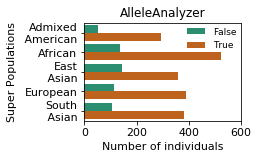

In [29]:
sns.set_palette('Dark2', n_colors=3)
fig, ax = plt.subplots(figsize=(2.8, 1.8))
sns.countplot(y='superpop', hue='AlleleAnalyzer', data=inds_cov.replace(superpop_dict).sort_values(by=['superpop','Coverage']))
plt.xlabel('Number of individuals')
plt.ylabel('Super Populations')
plt.xticks(rotation=0)
ax.legend(loc='upper right',prop={'size': 9},
         frameon=False,
         borderaxespad=0.1)
ax.set_xlim([0,600])
plt.title('AlleleAnalyzer')
fig.savefig('BEST1/set_cover_5kb/aa_set_cover.pdf',
           dpi=300, bbox_inches='tight')

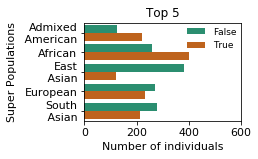

In [30]:
sns.set_palette('Dark2', n_colors=3)
fig, ax = plt.subplots(figsize=(2.8, 1.8))
sns.countplot(y='superpop', hue='Top 5', data=inds_cov.replace(superpop_dict).sort_values(by=['superpop','Coverage']))
plt.xlabel('Number of individuals')
plt.ylabel('Super Populations')
plt.xticks(rotation=0)
ax.legend(loc='upper right',prop={'size': 9},
         frameon=False,
         borderaxespad=0.1)
ax.set_xlim([0,600])
plt.title('Top 5')
fig.savefig('BEST1/set_cover_5kb/top5_cover.pdf',
           dpi=300, bbox_inches='tight')

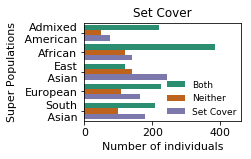

In [15]:
sns.set_palette('Dark2', n_colors=3)
fig, ax = plt.subplots(figsize=(2.8, 1.8))
sns.countplot(y='superpop', hue='Coverage', data=inds_cov.query('Coverage == "Set Cover" or Coverage == "Neither" or Coverage == "Both"').replace(superpop_dict).sort_values(by=['superpop','Coverage']))
plt.xlabel('Number of individuals')
plt.ylabel('Super Populations')
plt.xticks(rotation=0)
ax.legend(loc='lower right',prop={'size': 9},
         frameon=False,
         borderaxespad=0.1)
ax.set_xlim([0,460])
plt.title('Set Cover')
# fig.savefig('BEST1/set_cover_10kb/set_cover.pdf',
#            dpi=300)

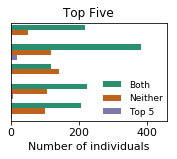

In [16]:
fig, ax = plt.subplots(figsize=(2.8, 1.8))
sns.countplot(y='superpop', hue='Coverage',
              data=inds_cov.query('Coverage == "Top 5" or Coverage == "Neither" or Coverage=="Both"').replace(superpop_dict).sort_values(by=['superpop','Coverage']))
plt.xlabel('Number of individuals')
# plt.xlabel(False)
plt.ylabel('Super Populations')
plt.xticks(rotation=45)
ax.legend(loc='lower right',prop={'size': 9},
         frameon=False,
         borderaxespad=0.1)
ax.set_xlim([0,460])
plt.ylabel('')
plt.title('Top Five')
plt.xticks(rotation=0)
# ax.xaxis.set_ticks_position('none') 
# plt.yticks(None)
ax.get_yaxis().set_visible(False)
# fig.savefig('BEST1/set_cover_10kb/top_5.pdf',
#            dpi=300)


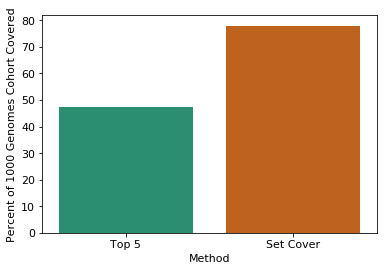

In [19]:
sns.barplot(y=[100.0*len(inds_cov.query('(Coverage == "Both") or (Coverage == "Top 5")'))/2504.0,100.0*len(inds_cov.query('(Coverage == "Both") or (Coverage == "Set Cover")'))/2504.0],
           x=['Top 5','Set Cover'])
plt.ylabel('Percent of 1000 Genomes Cohort Covered')
plt.xlabel('Method')

Plot each set of pairs on arcplot to see how they vary.

In [29]:
# save set cover arcplot df to file

pairs_available = pd.read_csv('BEST1/set_cover_5kb/best1_arcplot_all_pops.tsv', sep='\t', low_memory=False)

sc_pairs_used = pd.read_csv('BEST1/set_cover_5kb/best1_set_cover_5_pairs_pairs_used.txt', sep='\t')
sc_arcplot_out_list = []

for ix, row in sc_pairs_used.iterrows():
    var1 = row['var1']
    var2 = row['var2']
    sc_arcplot_out_list.append(pairs_available.query('(var1 == @var1) and (var2 == @var2)'))

sc_arcplot_out = pd.concat(sc_arcplot_out_list)
sc_arcplot_out['analysis_set'] = 'Set Cover'

top5_arcplot_out_list = []

for ix, row in top_shared.iterrows():
    var1 = row['var1']
    var2 = row['var2']
    top5_arcplot_out_list.append(pairs_available.query('(var1 == @var1) and (var2 == @var2)'))

top5_arcplot_out = pd.concat(top5_arcplot_out_list)
top5_arcplot_out['analysis_set'] = 'Top Five'

together = pd.concat([sc_arcplot_out, top5_arcplot_out])
together.to_csv('BEST1/set_cover_5kb/set_cover_top_5_arcplot.tsv', sep='\t',
     index=False)

Arcplots, set cover

Set cover + 5 overall 10 kb:

`Rscript ~/projects/AlleleAnalyzer/manuscript_analyses/DN_sgRNAs_compendium/src/arcplot_st_cover_for_paper.R set_cover_10kb/set_cover_top_5_arcplot.tsv set_cover_10kb/BEST1_set_cover_top5 0 61946721 61964465 5000 BEST1`

20kb:

`python ~/projects/AlleleAnalyzer/plotting_scripts/gen_arcplot_input.py set_cover_20kb/best1_exh.tsv set_cover_20kb/best1_arcplot_all_pops`

`Rscript ~/projects/AlleleAnalyzer/manuscript_analyses/DN_sgRNAs_compendium/src/arcplot_paper.R set_cover_20kb/best1_arcplot_all_pops.tsv set_cover_20kb/BEST1_filt10 10 61946721 61964465 5000 BEST1`

10kb:

`Rscript ~/projects/AlleleAnalyzer/manuscript_analyses/DN_sgRNAs_compendium/src/arcplot_paper.R set_cover_10kb/best1_all_pops_arcplot_input.tsv set_cover_10kb/BEST1_set_cover_arcplot 0 61946721 61964465 5000 BEST1`

arcplot set cover pairs

`Rscript ~/projects/AlleleAnalyzer/plotting_scripts/arcplot_generic.R set_cover_20kb/set_cover_5_pairs_for_arcplot.tsv set_cover_20kb/BEST1_set_cover 0 61946721 61964465 5000 BEST1`

5kb:

`python ~/projects/AlleleAnalyzer/plotting_scripts/gen_arcplot_input.py set_cover_5kb/best1_exh.tsv set_cover_5kb/best1_arcplot_all_pops`

`Rscript ~/projects/AlleleAnalyzer/plotting_scripts/arcplot_generic.R set_cover_5kb/best1_arcplot_all_pops.tsv set_cover_5kb/BEST1_filt10 10 61946721 61964465 5000 BEST1`

arcplot set cover pairs

`Rscript ~/projects/AlleleAnalyzer/plotting_scripts/arcplot_generic.R set_cover_5kb/set_cover_5_pairs_for_arcplot.tsv set_cover_5kb/BEST1_set_cover 0 61946721 61964465 5000 BEST1`

In [102]:
# save top 5 arcplot df to file

top5_arcplot_out_list = []

for ix, row in top_shared.iterrows():
    var1 = row['var1']
    var2 = row['var2']
    top5_arcplot_out_list.append(pairs_available.query('(var1 == @var1) and (var2 == @var2)'))

top5_arcplot_out = pd.concat(top5_arcplot_out_list)
top5_arcplot_out.to_csv('BEST1/top5_pairs_for_arcplot.tsv', sep='\t',
     index=False)

Each pair site has multiple potential sgRNAs.

In [36]:
# generate BED file for set cover sites

sc_positions = list(set(list(set(sc_arcplot_out['var1'].tolist())) + list(set(sc_arcplot_out['var2'].tolist()))))

In [37]:
len(sc_positions)

10

In [38]:
sc_pos_df = pd.DataFrame()
sc_pos_df['chrom'] = ['chr11'] * len(sc_positions)
sc_pos_df['start'] = sc_positions
sc_pos_df['start'] = sc_pos_df['start']
sc_pos_df['stop'] = sc_pos_df['start']
sc_pos_df['name'] = sc_pos_df.index.astype(str)
sc_pos_df['name'] = 'region' + sc_pos_df['name']
sc_pos_df.to_csv('BEST1/set_cover_5kb/set_cover_best1.bed', sep='\t', header=False, index=False)

Run gen_sgRNAs.py with `--sim` option to simulate a BCF with all heterozygous genotypes at these positions.

`python ~/projects/AlleleAnalyzer/scripts/gen_sgRNAs.py -v /pollard/data/genetics/1kg/phase3/hg38/ALL.chr11_GRCh38.genotypes.20170504.bcf /pollard/data/projects/AlleleAnalyzer_data/1kgp_data/hg38_analysis/1kgp_annotated_variants_by_chrom/chr11_annotated.h5 /pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/set_cover_analysis/BEST1/set_cover_5kb/set_cover_best1.bed /pollard/data/projects/AlleleAnalyzer_data/pam_sites_hg38/ /pollard/data/vertebrate_genomes/human/hg38/hg38/hg38.fa /pollard/home/kathleen/projects/AlleleAnalyzer/manuscript_analyses/DN_sgRNAs_compendium/BEST1/set_cover_5kb/guides_set_cover_best1 SpCas9,SaCas9 20 --bed --sim -d --crispor=hg38`

Make a version formatted for IGV.

`python ~/projects/AlleleAnalyzer/scripts/make_pretty_igv.py guides_set_cover_best1.tsv guides_best1_igv best1_set_cover --no_score`

Assess sgRNA scores from CRISPOR.

In [2]:
df = pd.read_csv('BEST1/set_cover_5kb/guides_set_cover_best1.tsv',
                sep='\t').replace(np.nan, 0)

In [3]:
loci = df['locus'].tolist() + df['locus'].tolist()
scores = df['offtargcount_ref'].tolist() + df['offtargcount_alt'].tolist()
labels = ['reference'] * len(df['scores_ref'].tolist()) + ['alternate'] * len(df['scores_alt'].tolist())
df_plot = pd.DataFrame({
    'sgRNA site':loci,
    'Off-Target Sites':scores,
    'Allele':labels
})

df_plot['region_'] = df_plot['sgRNA site'].str.split('region').str[1]
df_plot['region_'] = df_plot['region_'].astype(int) + 1

df_plot['sgRNA site'] = df_plot['region_']#['locus '] + df_plot['region_'].astype(str)

fig, ax = plt.subplots(figsize=(3.6, 1.0))
sns.set_palette('Dark2', n_colors=2)
sns.swarmplot(x='sgRNA site', y='Off-Target Sites', 
              hue='Allele',data=df_plot, dodge=True,
             size=3)
plt.title('Number of off-target sites per sgRNA')
plt.legend(loc='upper center',borderaxespad=0.2,
          prop={'size': 9},
          markerscale=0.5, frameon=False)
# plt.xticks(rotation=45)
plt.xlabel('sgRNA sites ordered by genomic position')
plt.ylabel('Number of\noff-target sites')
# fig.savefig('BEST1/set_cover_5kb/off_targets_for_sgRNAs.pdf',
#            dpi=300, bbox_inches='tight')

In [7]:
df.head()

,alt,cas_type,chrom,gRNA_alt,gRNA_ref,ref,start,stop,strand,variant_position,variant_position_in_guide,scores_ref,offtargcount_ref,scores_alt,offtargcount_alt,locus,id,guide_id
0,A,SpCas9,11,CATCTTCCCTGCCAAAGCAA,CGTCTTCCCTGCCAAAGCAA,G,61951552,61951572,positive,61951554,21,60,153,35.0,275.0,region0,0,SpCas9_0
1,A,SpCas9,11,ATCTTCCCTGCCAAAGCAAA,GTCTTCCCTGCCAAAGCAAA,G,61951553,61951573,positive,61951554,22,60,236,37.0,299.0,region0,1,SpCas9_1
2,A,SpCas9,11,TTGGCAGGGAAGATGTAGAT,TTGGCAGGGAAGACGTAGAT,G,61951547,61951567,negative,61951554,9,88,146,63.0,265.0,region0,2,SpCas9_2
3,A,SpCas9,11,GTGTCTGTACAAATGCCCTG,GTGTCTGTGCAAATGCCCTG,G,61950555,61950575,positive,61950564,14,34,685,39.0,300.0,region1,0,SpCas9_0
4,A,SpCas9,11,TCTGTACAAATGCCCTGAGG,TCTGTGCAAATGCCCTGAGG,G,61950558,61950578,positive,61950564,17,11,1157,30.0,411.0,region1,1,SpCas9_1


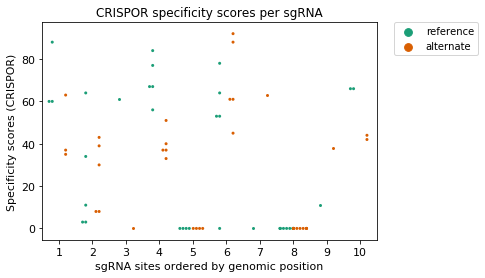

In [13]:
loci = df['locus'].tolist() + df['locus'].tolist()
scores = df['scores_ref'].tolist() + df['scores_alt'].tolist()
labels = ['reference'] * len(df['scores_ref'].tolist()) + ['alternate'] * len(df['scores_alt'].tolist())
df_plot = pd.DataFrame({
    'sgRNA site':loci,
    'Off-Target Sites':scores,
    'Allele':labels
})

df_plot['region_'] = df_plot['sgRNA site'].str.split('region').str[1]
df_plot['region_'] = df_plot['region_'].astype(int) + 1

df_plot['sgRNA site'] = df_plot['region_']#['locus '] + df_plot['region_'].astype(str)

fig, ax = plt.subplots()
sns.set_palette('Dark2', n_colors=2)
sns.swarmplot(x='sgRNA site', y='Off-Target Sites', 
              hue='Allele',data=df_plot, dodge=True,
             size=3)
plt.title('CRISPOR specificity scores per sgRNA')
plt.legend(loc='upper center',borderaxespad=0.2,
          prop={'size': 9},
          markerscale=0.5, frameon=False)
# plt.xticks(rotation=45)
plt.xlabel('sgRNA sites ordered by genomic position')
plt.ylabel('Specificity scores (CRISPOR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig.savefig('BEST1/set_cover_5kb/spec_scores_for_sgRNAs.pdf',
           dpi=300, bbox_inches='tight')